# Description:Essentials of processing and analysing tabular data in python with Pandas

## 1. Overview

In pandas, there are two major classes: The pd.DataFrame, the canonical class in Python  for handling structured data: 

In [1]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


...which we can also construct easily from a dictionary:

In [2]:
df = pd.DataFrame({
    'a': [1, 2, 3], 
    'b': 'a'
})
df

,a,b
0,1,a
1,2,a
2,3,a


Each column consists of a pd.Series class instance: 

In [3]:
print(type(df['a']))
df['a']

<class 'pandas.core.series.Series'>


0    1
1    2
2    3
Name: a, dtype: int64

Each column in the dataframe has a specific datatype: 

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

This means that "empty" may not mean empty. 

In [5]:
df = pd.DataFrame({
    'numeric': [1, 2, None], 
    'string': ['a', 'b', None]
})
df

,numeric,string
0,1.0,a
1,2.0,b
2,NaN,None


The empty equivalent used by pandas is the np.nan

In [6]:
df.loc[2, 'numeric']

nan

We now explore the dataset

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can also get some basic plots, in this case for 2 random walks: 

<AxesSubplot:>

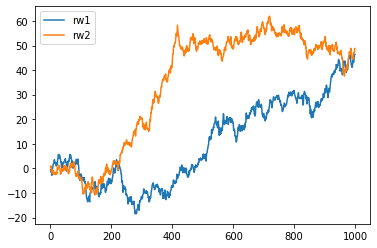

In [8]:
import numpy as np 

np.random.seed(40)
df = pd.DataFrame({
    'rw1': np.random.normal(size=1000).cumsum(), 
    'rw2': np.random.normal(size=1000).cumsum()
})
df.plot()

In pandas there are two ways of indexing. .iloc allows to index by position: 

In [9]:
df.iloc[0, 0]

-0.6075476972112264

loc allows to index by label, so the index on the row, and the column name (the default index is 0, 1, ...): 

In [10]:
df.loc[0, 'rw1']

-0.6075476972112264

## 2. Basic manipulations

We can easily filter our rows as follows: 

In [11]:
filt = df['rw1'] < -10
df[filt]

,rw1,rw2
118,-11.144773,-8.413354
119,-12.072784,-7.824287
120,-12.625950,-7.992161
121,-12.838501,-6.354645
122,-13.571991,-6.551068
...,...,...
388,-11.487367,38.178739
389,-11.930840,39.670779
390,-11.786314,39.265781
391,-10.477835,40.194245


Multiple filters can be combined with | (or) or & (and): 

In [12]:
filt |= df['rw1'] > 40
df[filt]

,rw1,rw2
118,-11.144773,-8.413354
119,-12.072784,-7.824287
120,-12.625950,-7.992161
121,-12.838501,-6.354645
122,-13.571991,-6.551068
...,...,...
995,43.072505,46.868492
996,43.992764,47.034041
997,45.464692,47.010604
998,46.561055,47.524414


When cleaning messy data, replacing and type casting can be very useful:

In [13]:
df = pd.DataFrame({
    'col_with_mixed_dtypes': ['0', 'not relevant', '9']
})
df.replace({'not relevant': None}, inplace=True)
df['col_cleaned'] = pd.to_numeric(df['col_with_mixed_dtypes'])
print(df.dtypes)
df

col_with_mixed_dtypes     object
col_cleaned              float64
dtype: object


,col_with_mixed_dtypes,col_cleaned
0,0,0.0
1,None,NaN
2,9,9.0


When working with dates, pd.Timestamp is very helpful: 

In [14]:
df = pd.DataFrame({
    'dates_as_string': ['2020-01-01', '2020-01-02']
})
df['dates_as_timestamp'] = pd.to_datetime(df['dates_as_string'])
df.dtypes

dates_as_string               object
dates_as_timestamp    datetime64[ns]
dtype: object

There may be a case where we have to construct the Timestamp from some weird string: 

In [15]:
df = pd.DataFrame({
    'dates_as_string': ['2020_01', '2020_02']
})
df['dates_as_timestamp'] = [
    pd.Timestamp(year=int(x.split('_')[0]), month=int(x.split('_')[1]), day=1)
    for x in df['dates_as_string']
]
df

,dates_as_string,dates_as_timestamp
0,2020_01,2020-01-01
1,2020_02,2020-02-01


We can easily drop empty rows: 

In [16]:
df = pd.DataFrame({
    'some_string_col': ['something', None, 'something_else']
})
df.dropna(inplace=True)
df

,some_string_col
0,something
2,something_else


We can also rename columns

In [17]:
df.rename(columns={'some_string_col': 'renamed'})

,renamed
0,something
2,something_else


We can also do very simple algebraic operations: 

In [18]:
df = pd.DataFrame({
    'units': [1, 2, 3], 
    'price': [4, 5, 6.5]
})
df['revenue'] = df['units'] * df['price']
df

,units,price,revenue
0,1,4.0,4.0
1,2,5.0,10.0
2,3,6.5,19.5


## 3 More advanced manipulations

An extremely powerful method is the groupby

In [19]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df = pd.read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
df1 = pd.DataFrame({
    'a': [1, 1, 1], 
    'b': [1, 1, 2], 
    'c': 2
})
df1.groupby(['a', 'b'], as_index=False).mean().drop(columns='c')

,a,b
0,1,1
1,1,2


In [21]:
pd.DataFrame({'species': df['species'].unique()})

,species
0,setosa
1,versicolor
2,virginica


In [22]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


We can also define different aggregates per columns:

In [23]:
df \
    .groupby('species') \
    .agg({
        'sepal_width': 'sum', 
        'petal_length': 'mean'
    })

,sepal_width,petal_length
species,,
setosa,171.4,1.462
versicolor,138.5,4.260
virginica,148.7,5.552


Or we aggregate multiple columns: 

In [24]:
df \
    .groupby('species') \
    .apply(lambda x: pd.Series(
        [
            x['sepal_width'].mean(), 
            (x['sepal_width'] / x['petal_length']).mean(), 
        ], 
        index=['some_col1', 'some_col2']
    ))

,some_col1,some_col2
species,,
setosa,3.428,2.373463
versicolor,2.770,0.653833
virginica,2.974,0.538352


Let's now start again with our random walks and transform them from wide format to long format

In [25]:
df = pd.DataFrame({
    'product_id': range(1000),
    'date1': np.random.normal(size=1000).cumsum(), 
    'date2': np.random.normal(size=1000).cumsum()
})
df.head()

,product_id,date1,date2
0,0,-0.047826,-0.136637
1,1,0.014095,0.391579
2,2,-0.837701,-0.391146
3,3,0.057441,-0.197642
4,4,-0.710424,-1.488270


...and transform the dataframe from wide format to long format

In [26]:
df_long = pd.melt(df, id_vars='product_id', var_name='date')
df_long.head()

,product_id,date,value
0,0,date1,-0.047826
1,1,date1,0.014095
2,2,date1,-0.837701
3,3,date1,0.057441
4,4,date1,-0.710424


In [27]:
df = pd.DataFrame({
    'rw1': np.random.normal(size=1000).cumsum(), 
    'rw2': np.random.normal(size=1000).cumsum()
})
df_long = pd.melt(df)
df_long

,variable,value
0,rw1,0.564297
1,rw1,1.976236
2,rw1,0.610704
3,rw1,0.458099
4,rw1,-0.228144
...,...,...
1995,rw2,-5.463118
1996,rw2,-5.262946
1997,rw2,-5.632104
1998,rw2,-4.590803


We can now compute the grouped moving average

In [28]:
df_long['ma'] = df_long \
    .groupby('variable', as_index=False) \
    .rolling(14, 1).mean() \
    ['value']
df_long

,variable,value,ma
0,rw1,0.564297,0.564297
1,rw1,1.976236,1.270267
2,rw1,0.610704,1.050412
3,rw1,0.458099,0.902334
4,rw1,-0.228144,0.676238
...,...,...,...
1995,rw2,-5.463118,-4.631621
1996,rw2,-5.262946,-4.584078
1997,rw2,-5.632104,-4.587950
1998,rw2,-4.590803,-4.556019


We can now plot each rolling window: 

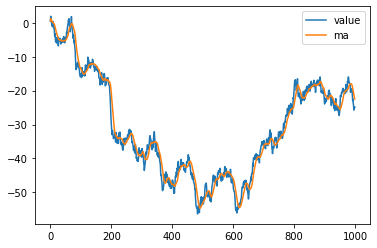

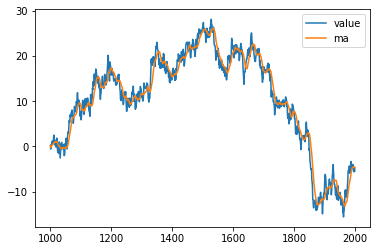

In [29]:
for var in ['rw1', 'rw2']: 
    df_long[df_long['variable'] == var].plot()

We can also do the opposite operation of transforming long data into wide format

In [30]:
df = pd.DataFrame({
    'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
    'baz': [1, 2, 3, 4, 5, 6],
    'zoo': ['x', 'y', 'z', 'q', 'w', 't']}
)
df
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


We can join using the merge method (similar to JOIN in sql)

In [31]:
df1 = pd.DataFrame({
    'key': ['foo', 'bar', 'baz', 'foo'],
    'v1': [1, 2, 3, 5]}
)
df2 = pd.DataFrame({
    'key': ['bar', 'baz'],
    'v2': [6, 7]}
)
df1.merge(df2, on='key', how='inner')

,key,v1,v2
0,bar,2,6
1,baz,3,7


...and we can stack datatrames or series (UNION in sql) using concat

In [32]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

# 4. Putting things together: merging multiple Excel sheets

In [34]:
path = 'resources/dummy_excel.xlsx'
sheets = ['Sheet1', 'Sheet2']
df = pd.concat([pd.read_excel(path, sheet) for sheet in sheets])
df

,a,b,c,d
0,1,2,3.0,NaN
1,4,5,6.0,NaN
0,4,5,NaN,6.0
1,7,8,NaN,9.0
